# **Assumptions of Linear Regression with practical Implementation**

**Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [2]:
url = "https://raw.githubusercontent.com/subhashdixit/Machine_Learning/main/datasets/data_linear_regression_assumptions.csv"
df = pd.read_csv(url)

**Show 5 elements of the dataset**

In [3]:
df.head()

,A,B,C,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


**Segregating Independent and Dependent features**

In [4]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

**Train Test Split**

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## **Model Creation - Linear Regression**

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Residual Calculation**

In [7]:
y_pred = model.predict(X_test)
residual = y_test - y_pred

## **Verification of all the Linear Regression Assumptions**

### **1. Linear Relationship**
*  The independent varoiables should be in a linear relation with the dependent variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


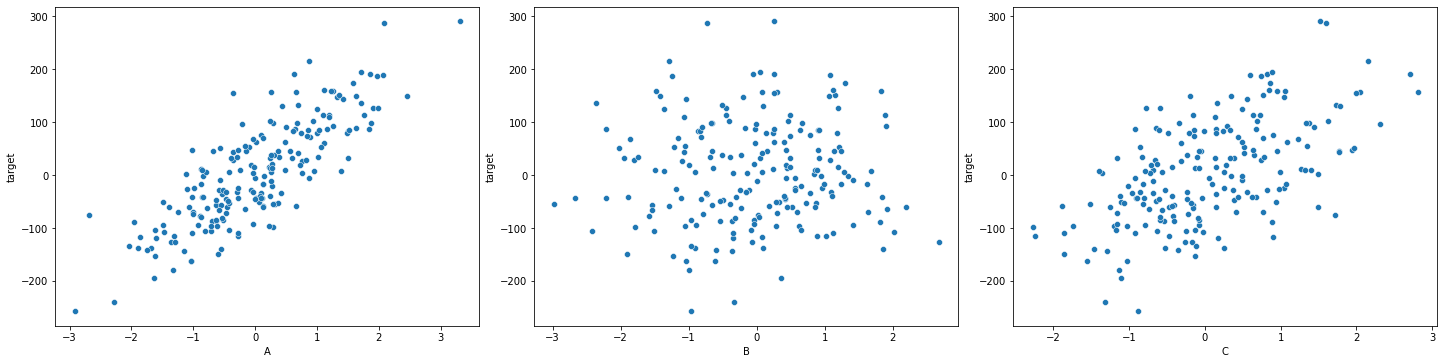

In [8]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,5))
index = 0
ax = ax.flatten()
for col, value in df.items():
  sns.scatterplot(df[col], df['target'], ax=ax[index])
 
  index += 1
  if index == 3:
    break
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### **2. Multicollinearity**
*  No multi-collinearity in independent variables

**VIF Check**

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,A,B,C
vif,1.010326,1.009871,1.01395


**Observation:**
* VIF values shhould be less than 5

**Correlation Check**

In [10]:
df.iloc[:,0:3].corr()

,A,B,C
A,1.000000,-0.001055,0.049286
B,-0.001055,1.000000,0.060387
C,0.049286,0.060387,1.000000


**Heatmap check**

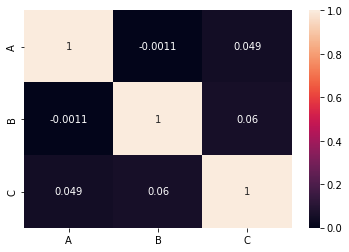

In [11]:
sns.heatmap(data = df.iloc[:,0:3].corr(),annot=True)

### **3. Normality of Residual**
* The residual errors should be normally distributed

**Normal Distribution check using distplot**

<Figure size 720x360 with 0 Axes>

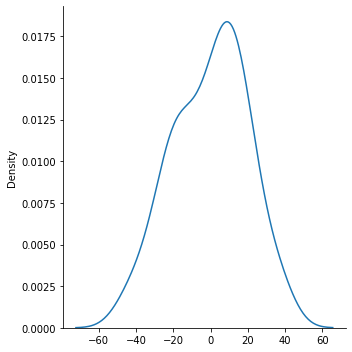

In [12]:
plt.figure(figsize=(10,5))
sns.displot(residual,kind='kde')

**Normal distribution check using QQ plot**

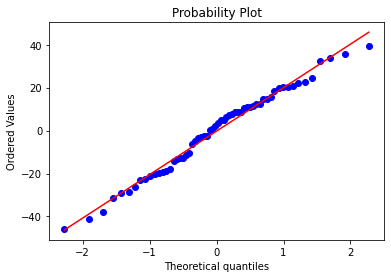

In [13]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

### **4. Homoscedasticity**
*  The residual errors should be of a constant variance at any value of independent variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

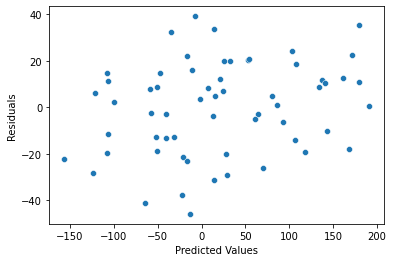

In [14]:
# plt.scatter(y_pred,residual)
sns.scatterplot(y_pred, residual)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

### **5. Autocorrelation of Residuals**
* No auto-correlation between the residuals

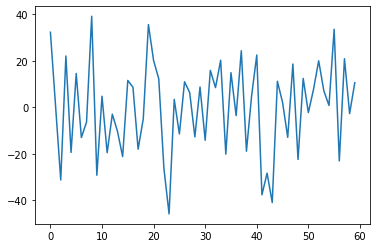

In [15]:
plt.plot(residual)

# **<center>THE END</center>**